In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from  sklearn.metrics import roc_auc_score, roc_curve,recall_score

In [86]:
data=pd.read_csv('Data.csv')

In [18]:
data.head()

,customer,calibrat,churn,revenue,mou,recchrge,directas,overage,roam,changem,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
0,1000002,0,0,57.4925,482.75,37.425,0.2475,22.75,0.0,532.25,...,0,0,1,0,0,5,0,0,149.990000,0
1,1000006,0,0,82.2750,1312.25,75.000,1.2375,0.00,0.0,156.75,...,0,1,0,0,0,6,0,0,9.989998,0
2,1000010,0,0,31.6625,25.50,29.990,0.2475,0.00,0.0,59.50,...,0,0,1,0,0,9,0,0,29.989990,0
3,1000011,0,0,62.1275,97.50,65.985,2.4750,0.00,0.0,23.50,...,0,1,0,0,0,6,0,0,29.989990,0
4,1000014,0,0,25.2250,2.50,25.000,0.0000,0.00,0.0,-2.50,...,0,1,0,0,0,7,0,0,29.989990,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 69 columns):
customer    71047 non-null int64
calibrat    71047 non-null int64
churn       71047 non-null int64
revenue     70831 non-null float64
mou         70831 non-null float64
recchrge    70831 non-null float64
directas    70831 non-null float64
overage     70831 non-null float64
roam        70831 non-null float64
changem     70545 non-null float64
changer     70545 non-null float64
dropvce     71047 non-null float64
blckvce     71047 non-null float64
unansvce    71047 non-null float64
custcare    71047 non-null float64
threeway    71047 non-null float64
mourec      71047 non-null float64
outcalls    71047 non-null float64
incalls     71047 non-null float64
peakvce     71047 non-null float64
opeakvce    71047 non-null float64
dropblk     71047 non-null float64
callfwdv    71047 non-null float64
callwait    71047 non-null float64
months      71047 non-null int64
uniqsubs    71047 non-nu

many age1 and age2 values are missing, need to estimate them

In [92]:
data.describe()

,customer,calibrat,churn,revenue,mou,recchrge,directas,overage,roam,changem,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
count,7.104700e+04,71047.000000,71047.000000,70831.000000,70831.000000,70831.000000,70831.000000,70831.000000,70831.000000,70545.000000,...,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000
mean,1.050487e+06,0.563008,0.290076,58.852803,525.728392,46.876304,0.894027,40.095361,1.221071,-10.846461,...,0.017918,0.192943,0.138781,0.050854,0.249835,4.334229,0.013456,0.566512,35.798582,0.034034
std,2.919911e+04,0.496018,0.453800,44.243583,530.134259,23.915095,2.197709,96.347103,9.081089,255.314315,...,0.141485,0.394611,0.345721,0.290444,0.432920,3.137063,0.115217,0.495560,57.040964,0.181317
min,1.000001e+06,0.000000,0.000000,-6.167500,0.000000,-11.290000,0.000000,0.000000,0.000000,-3875.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.025144e+06,0.000000,0.000000,33.642500,158.250000,30.000000,0.000000,0.000000,0.000000,-83.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.050370e+06,1.000000,0.000000,48.530000,366.000000,44.990000,0.247500,2.500000,0.000000,-5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,1.076230e+06,1.000000,1.000000,71.030000,721.750000,59.990000,0.990000,40.750000,0.257500,65.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,39.989990,0.000000
max,1.099999e+06,1.000000,1.000000,1223.380000,7667.750000,399.990000,159.390000,4320.750000,1112.448000,5192.250000,...,4.000000,1.000000,1.000000,35.000000,1.000000,9.000000,1.000000,1.000000,499.990000,1.000000


In [6]:
data.var()==0

customer    False
calibrat    False
churn       False
revenue     False
mou         False
recchrge    False
directas    False
overage     False
roam        False
changem     False
changer     False
dropvce     False
blckvce     False
unansvce    False
custcare    False
threeway    False
mourec      False
outcalls    False
incalls     False
peakvce     False
opeakvce    False
dropblk     False
callfwdv    False
callwait    False
months      False
uniqsubs    False
actvsubs    False
phones      False
models      False
eqpdays     False
            ...  
webcap      False
truck       False
rv          False
occprof     False
occcler     False
occcrft     False
occstud     False
occhmkr     False
occret      False
occself     False
ownrent     False
marryun     False
marryyes    False
mailord     False
mailres     False
mailflag    False
travel      False
pcown       False
creditcd    False
retcalls    False
retaccpt    False
newcelly    False
newcelln    False
refer       False
incmiss   

In [7]:
print((data.calibrat.value_counts()/len(data)*100).round(2))

1    56.3
0    43.7
Name: calibrat, dtype: float64


In [8]:
data.nunique()

customer    71047
calibrat        2
churn           2
revenue     31115
mou          8933
recchrge     6906
directas      157
overage      2328
roam         4353
changem      6847
changer     26264
dropvce       304
blckvce       401
unansvce      916
custcare      198
threeway       88
mourec      41634
outcalls      841
incalls       500
peakvce      2002
opeakvce     1817
dropblk       481
callfwdv       39
callwait      246
months         56
uniqsubs       15
actvsubs       12
phones         24
models         14
eqpdays      1496
            ...  
webcap          2
truck           2
rv              2
occprof         2
occcler         2
occcrft         2
occstud         2
occhmkr         2
occret          2
occself         2
ownrent         2
marryun         2
marryyes        2
mailord         2
mailres         2
mailflag        2
travel          2
pcown           2
creditcd        2
retcalls        5
retaccpt        5
newcelly        2
newcelln        2
refer          13
incmiss   

In [9]:
data.describe()

,customer,calibrat,churn,revenue,mou,recchrge,directas,overage,roam,changem,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
count,7.104700e+04,71047.000000,71047.000000,70831.000000,70831.000000,70831.000000,70831.000000,70831.000000,70831.000000,70545.000000,...,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000
mean,1.050487e+06,0.563008,0.290076,58.852803,525.728392,46.876304,0.894027,40.095361,1.221071,-10.846461,...,0.017918,0.192943,0.138781,0.050854,0.249835,4.334229,0.013456,0.566512,35.798582,0.034034
std,2.919911e+04,0.496018,0.453800,44.243583,530.134259,23.915095,2.197709,96.347103,9.081089,255.314315,...,0.141485,0.394611,0.345721,0.290444,0.432920,3.137063,0.115217,0.495560,57.040964,0.181317
min,1.000001e+06,0.000000,0.000000,-6.167500,0.000000,-11.290000,0.000000,0.000000,0.000000,-3875.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.025144e+06,0.000000,0.000000,33.642500,158.250000,30.000000,0.000000,0.000000,0.000000,-83.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.050370e+06,1.000000,0.000000,48.530000,366.000000,44.990000,0.247500,2.500000,0.000000,-5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,1.076230e+06,1.000000,1.000000,71.030000,721.750000,59.990000,0.990000,40.750000,0.257500,65.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,39.989990,0.000000
max,1.099999e+06,1.000000,1.000000,1223.380000,7667.750000,399.990000,159.390000,4320.750000,1112.448000,5192.250000,...,4.000000,1.000000,1.000000,35.000000,1.000000,9.000000,1.000000,1.000000,499.990000,1.000000


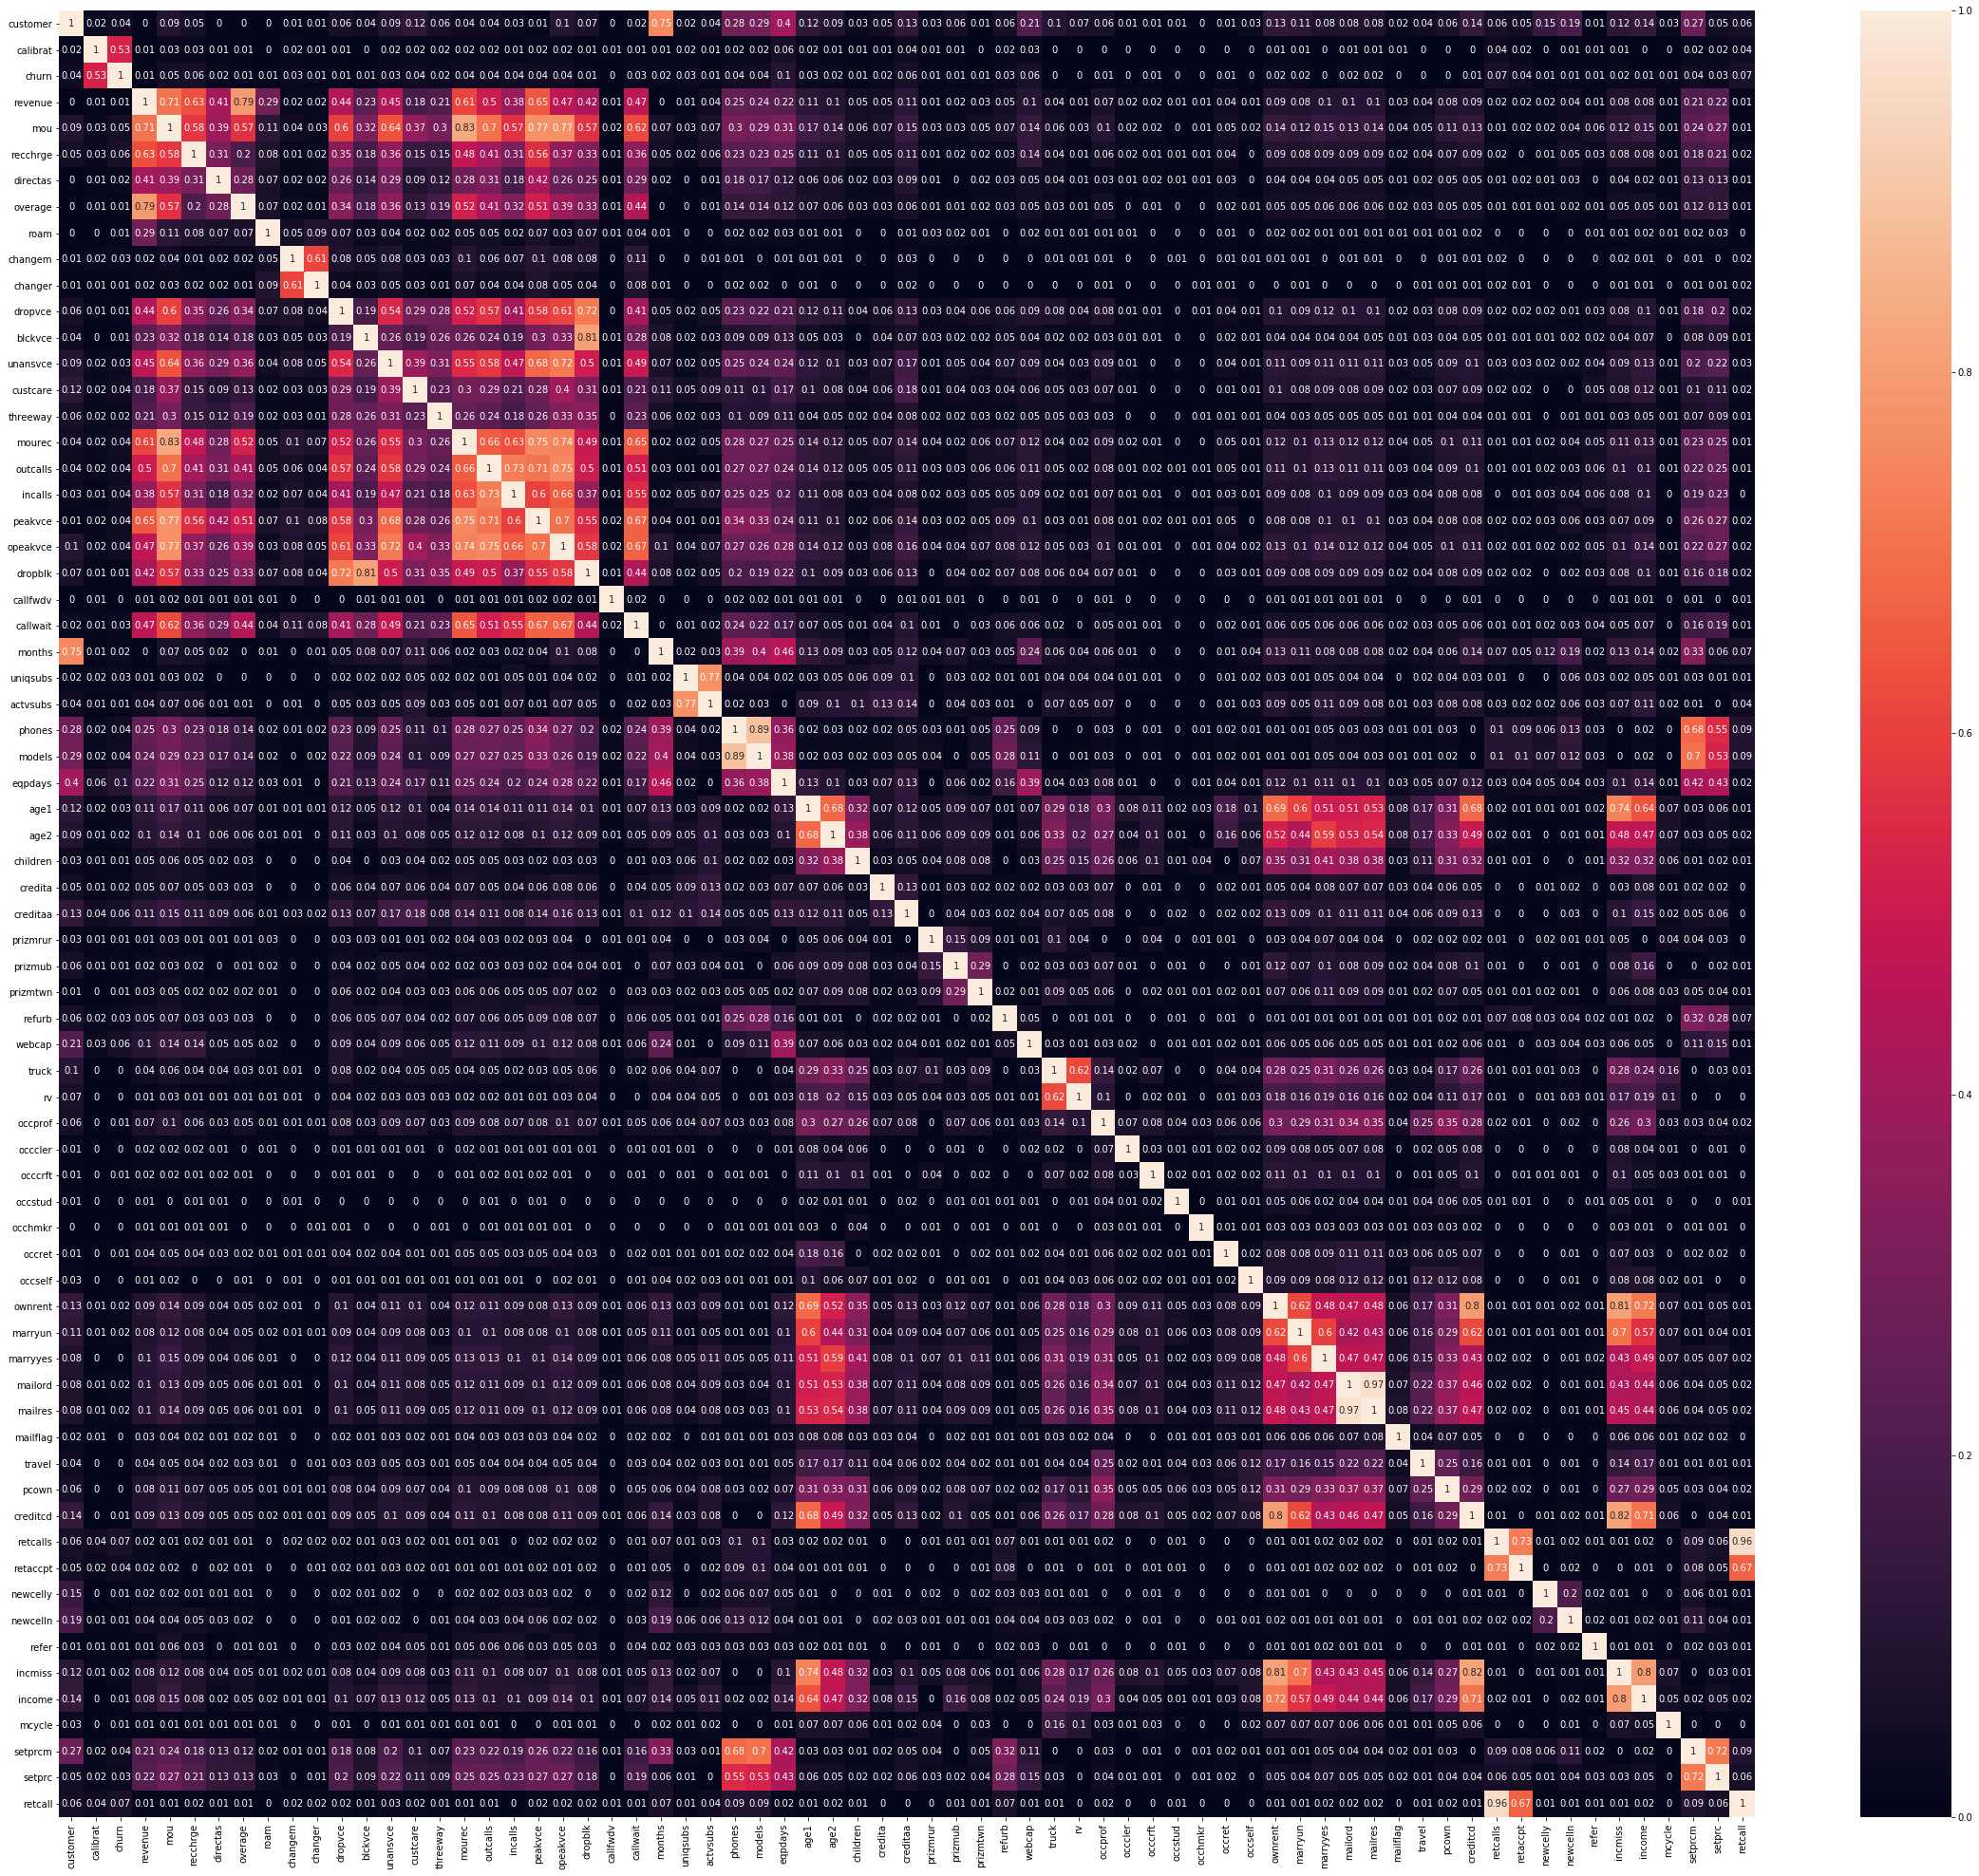

In [10]:
plt.figure(figsize=(40,35))
sns.heatmap(data.corr().abs().round(2),annot=True)
plt.show()

In [149]:
corr_matrix = data.corr().abs().round(2)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
sol[sol>=0.75]

mailord   mailres     0.97
retcalls  retcall     0.96
phones    models      0.89
mou       mourec      0.83
creditcd  incmiss     0.82
blckvce   dropblk     0.81
ownrent   incmiss     0.81
          creditcd    0.80
incmiss   income      0.80
revenue   overage     0.79
uniqsubs  actvsubs    0.77
mou       opeakvce    0.77
          peakvce     0.77
mourec    peakvce     0.75
customer  months      0.75
outcalls  opeakvce    0.75
dtype: float64

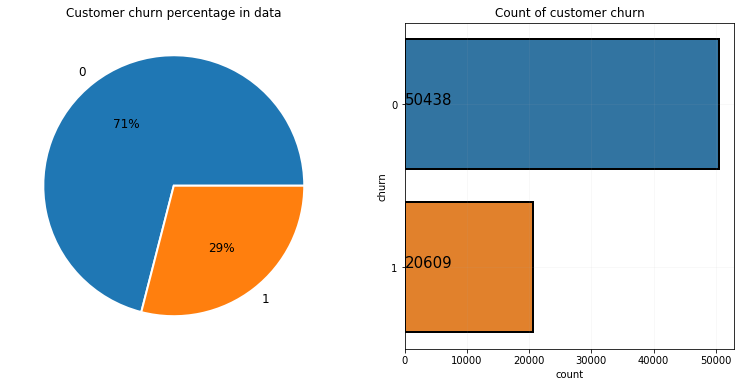

In [91]:
plt.figure(figsize=(13,6))
plt.subplot(121)
data["churn"].value_counts().plot.pie(autopct  = "%1.0f%%",
                                        fontsize = 12,
                                        wedgeprops = {"linewidth" : 2,
                                                      "edgecolor" : "w"},
                                       )
plt.title("Customer churn percentage in data")
plt.ylabel("")

plt.subplot(122)
ax = sns.countplot(y = data["churn"],linewidth = 2,
                   edgecolor = "k"*data["churn"].nunique())
for i,j in enumerate(data["churn"].value_counts().values) : 
    ax.text(.1,i,j,fontsize = 15,color = "k")
plt.title("Count of customer churn")
plt.grid(True,alpha = .1)
    
plt.show()

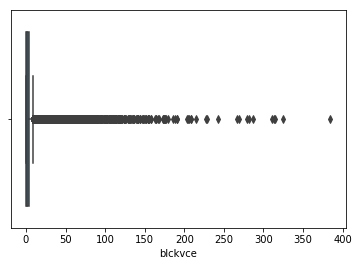

In [150]:
sns.boxplot(data.blckvce)

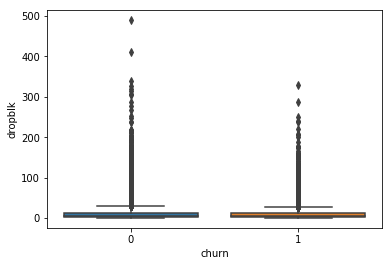

In [13]:
sns.boxplot(data.churn,data.dropblk)

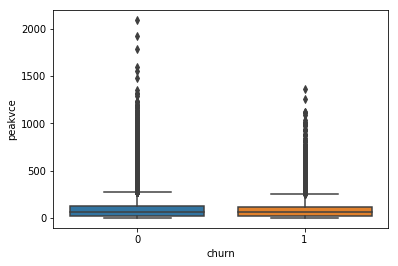

In [14]:
sns.boxplot(data.churn,data.peakvce)

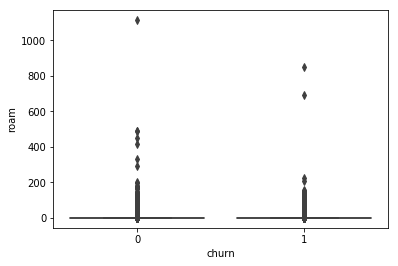

In [33]:
sns.boxplot(data.churn,data.roam)

# Outlier Identification

In [58]:
X=data.drop("churn",axis=1)
Y=data.churn

In [95]:
data_df = pd.DataFrame(X)
columns = data_df.columns
data_df.head()

,customer,calibrat,revenue,mou,recchrge,directas,overage,roam,changem,changer,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
0,1000002,0,57.4925,482.75,37.425,0.2475,22.75,0.0,532.25,50.9875,...,0,0,1,0,0,5,0,0,149.990000,0
1,1000006,0,82.2750,1312.25,75.000,1.2375,0.00,0.0,156.75,8.1450,...,0,1,0,0,0,6,0,0,9.989998,0
2,1000010,0,31.6625,25.50,29.990,0.2475,0.00,0.0,59.50,4.0275,...,0,0,1,0,0,9,0,0,29.989990,0
3,1000011,0,62.1275,97.50,65.985,2.4750,0.00,0.0,23.50,6.8225,...,0,1,0,0,0,6,0,0,29.989990,0
4,1000014,0,25.2250,2.50,25.000,0.0000,0.00,0.0,-2.50,-0.2250,...,0,1,0,0,0,7,0,0,29.989990,0


In [73]:
Q1 = data_df.quantile(0.25)
Q3 = data_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

customer    51085.500000
calibrat        1.000000
revenue        37.387500
mou           563.500000
recchrge       29.990000
directas        0.990000
overage        40.750000
roam            0.257500
changem       148.750000
changer         8.712500
dropvce         7.000000
blckvce         3.666667
unansvce       31.333337
custcare        1.666667
threeway        0.333333
mourec        145.705000
outcalls       30.666667
incalls         9.333333
peakvce        98.166650
opeakvce       77.666660
dropblk        11.000003
callfwdv        0.000000
callwait        1.333333
months         13.000000
uniqsubs        1.000000
actvsubs        1.000000
phones          1.000000
models          1.000000
eqpdays       311.000000
age1           48.000000
                ...     
webcap          0.000000
truck           0.000000
rv              0.000000
occprof         0.000000
occcler         0.000000
occcrft         0.000000
occstud         0.000000
occhmkr         0.000000
occret          0.000000


In [102]:
data_df_out = data_df[~((data_df < (Q1 - 1.5 * IQR)) |(data_df > (Q3 + 1.5 * IQR))).any(axis=1)]
data_df_out.shape

(2195, 68)

In [104]:
data_df_out.head()

,customer,calibrat,revenue,mou,recchrge,directas,overage,roam,changem,changer,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
1294,1004137,0,63.2400,277.25,69.99,0.0000,0.0,0.0,-46.25,0.0000,...,0,0,0,0,0,3,0,0,29.98999,0
1442,1004628,0,51.5900,388.25,69.99,0.0000,4.0,0.0,241.75,4.8000,...,0,0,0,0,0,6,0,0,29.98999,0
1660,1005359,0,82.4200,246.00,79.99,1.9800,43.0,0.0,-2.00,1.6200,...,0,0,0,0,0,9,0,0,29.98999,0
1706,1005496,0,30.7700,104.00,29.99,0.7425,0.0,0.0,13.00,-0.7800,...,0,0,0,0,0,7,0,0,29.98999,0
1776,1005697,0,32.7375,58.50,32.49,0.2475,0.0,0.0,65.50,-0.2475,...,0,0,0,0,0,8,0,0,29.98999,0


In [106]:
data_df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2195 entries, 1294 to 71037
Data columns (total 68 columns):
customer    2195 non-null int64
calibrat    2195 non-null int64
revenue     2186 non-null float64
mou         2186 non-null float64
recchrge    2186 non-null float64
directas    2186 non-null float64
overage     2186 non-null float64
roam        2186 non-null float64
changem     2178 non-null float64
changer     2178 non-null float64
dropvce     2195 non-null float64
blckvce     2195 non-null float64
unansvce    2195 non-null float64
custcare    2195 non-null float64
threeway    2195 non-null float64
mourec      2195 non-null float64
outcalls    2195 non-null float64
incalls     2195 non-null float64
peakvce     2195 non-null float64
opeakvce    2195 non-null float64
dropblk     2195 non-null float64
callfwdv    2195 non-null float64
callwait    2195 non-null float64
months      2195 non-null int64
uniqsubs    2195 non-null int64
actvsubs    2195 non-null int64
phones      219

In [115]:
data_df_out.describe()

,customer,calibrat,revenue,mou,recchrge,directas,overage,roam,changem,changer,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
count,2.195000e+03,2195.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2178.000000,2178.000000,...,2195.0,2195.0,2195.0,2195.0,2195.0,2195.000000,2195.0,2195.000000,2195.000000,2195.0
mean,1.055142e+06,0.558542,37.381953,215.221866,39.039265,0.259690,6.583867,0.038185,-8.052189,-1.200345,...,0.0,0.0,0.0,0.0,0.0,5.810478,0.0,0.827335,6.790982,0.0
std,2.600722e+04,0.496674,15.241376,193.385173,16.293062,0.457657,14.444905,0.114117,79.948122,4.852984,...,0.0,0.0,0.0,0.0,0.0,2.102778,0.0,0.378044,16.969243,0.0
min,1.002277e+06,0.000000,-5.862500,0.000000,-5.330000,0.000000,0.000000,0.000000,-303.000000,-20.160000,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.0
25%,1.033114e+06,0.000000,30.142500,72.000000,29.990000,0.000000,0.000000,0.000000,-44.750000,-1.581250,...,0.0,0.0,0.0,0.0,0.0,4.000000,0.0,1.000000,0.000000,0.0
50%,1.055440e+06,1.000000,34.990000,169.750000,39.990000,0.000000,0.000000,0.000000,-5.000000,-0.195000,...,0.0,0.0,0.0,0.0,0.0,6.000000,0.0,1.000000,0.000000,0.0
75%,1.077067e+06,1.000000,45.330625,304.562500,44.990000,0.247500,5.000000,0.000000,26.437500,0.000000,...,0.0,0.0,0.0,0.0,0.0,7.000000,0.0,1.000000,0.000000,0.0
max,1.099977e+06,1.000000,125.190000,1390.500000,99.990000,2.227500,101.750000,0.642500,284.750000,14.667500,...,0.0,0.0,0.0,0.0,0.0,9.000000,0.0,1.000000,79.989990,0.0


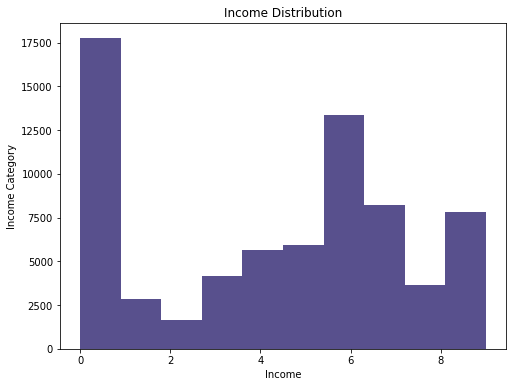

In [126]:
plt.figure(figsize=(8,6)) #making the plot bigger
#draw plot
plt.hist(data.income, 
         bins=10, #defining number of bins
         color="#58508d" #changing color
)
plt.title("Income Distribution") #giving a title to the graph
plt.ylabel("Income Category")#giving title to y axis
plt.xlabel("Income")#giving title to x axis
plt.show()#showing the plot

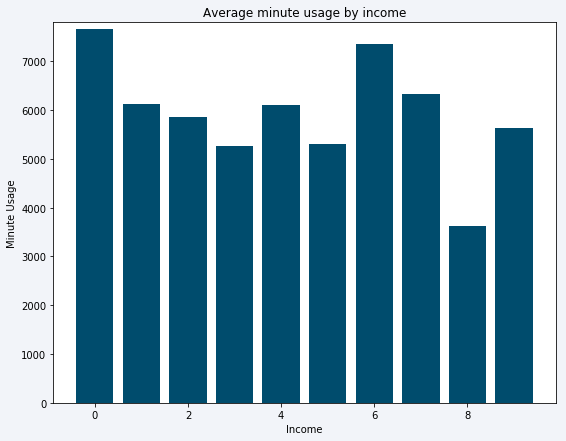

In [146]:
#Vertical bar plot
plt.figure(figsize=(9,7),facecolor="#f2f4f9")
#draw plot
plt.bar(data.income, data.mou, color="#004c6d")
plt.ylim(0,7800)
plt.title("Average minute usage by income")
plt.ylabel("Minute Usage")
plt.xlabel("Income")
plt.show()

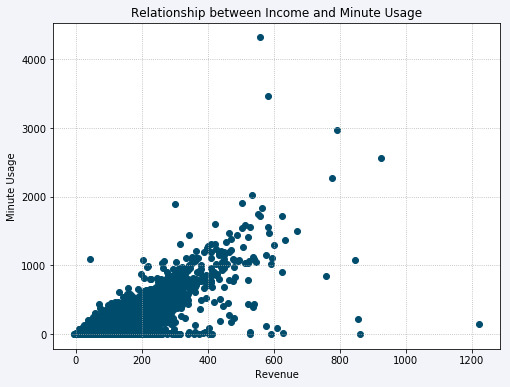

In [147]:
plt.figure(figsize=(8,6), facecolor="#f2f4f9")
plt.scatter(data.revenue,
            data.overage,
            color="#004c6d")
plt.title("Relationship between Income and Minute Usage")
plt.xlabel("Revenue")
plt.ylabel("Minute Usage")
plt.grid(b=True,
         linestyle=':'
)
plt.show()